In [1]:
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

# Ambient state

In [15]:
from pycfd.reference.atmospheric_flow import stratification_profiles, saturation_calculation

ambient_stratification = stratification_profiles.Soong1973Dry()

# Model integration

In [16]:
import odespy, numpy
from pyclouds import cloud_equations, plotting

In [17]:
g = ambient_stratification.g
R_d = ambient_stratification.gas_properties.R()
cp_d = ambient_stratification.gas_properties.cp()

constants = {'R_d': R_d, 'cp_d': cp_d, 'g': g }

In [18]:
from pyclouds.common import Var

z_points = numpy.linspace(100., 4e3, 500)

w0 = 0.1
T0 = T_e(0.0) + 0.2

In [19]:
cloud_model = cloud_equations.DryAirOnly(environment=ambient_stratification, constants=constants, D=2.)

initial_condition = Var.make_state(r=500.0, w=w0, T=T0)
p1 = cloud_model.integrate(initial_condition, z_points)

Integration stopped: vertical velocity dropped to zero
RKFehlberg terminated at t=998.798


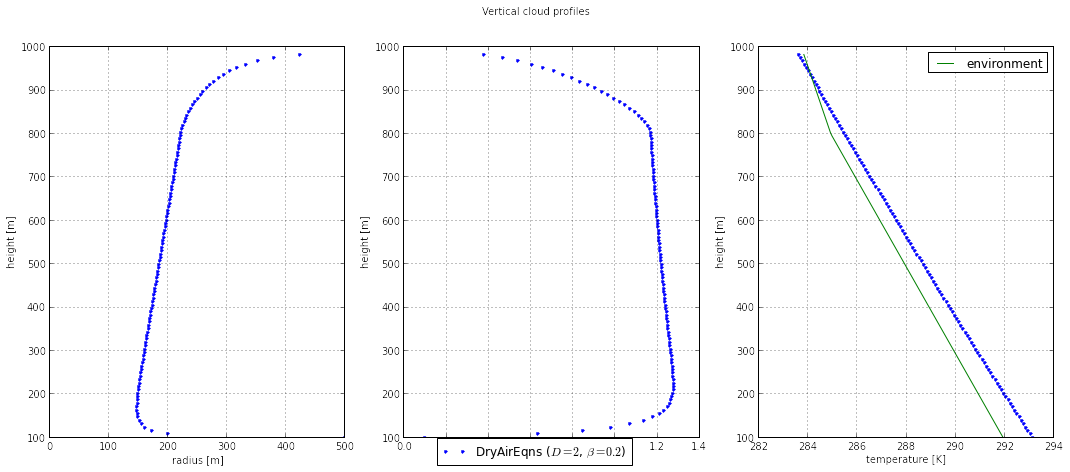

In [14]:
plot = p1.plot()

In [ ]:
from pyclouds.cloud_equations import Var

def test_drag():    
    cloud_model = cloud_equations.DryAirOnly(environment=environment, constants=constants, D=1.0)
    F1, _ = cloud_model.integrate(initial_condition, z_points)

    cloud_model = cloud_equations.DryAirOnly(environment=environment, constants=constants, D=2.0)
    F2, _ = cloud_model.integrate(initial_condition, z_points)
    
    assert F1[:,Var.w].max() > F2[:,Var.w].max()
    
test_drag()